<a href="https://colab.research.google.com/github/BorisOskolkov/MLcourse/blob/main/asng01/A01_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Made by Boris Oskolkov for Assignment01 (CS5783)

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import string
import pandas as pd
from IPython.display import Image

 --------- start of a first problem --------------

Let's plot training data to choose the basis of our model.

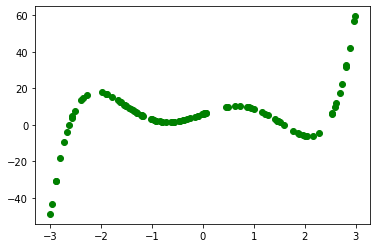

In [ ]:
#plot training data
x_data=np.load('x_train.npy')
y_data=np.load('y_train.npy')
plt.plot(x_data, y_data, 'go')
plt.show()

We clearly see that it involves cubic polynomial basis. But, Somethig in the middle looks suspiciously different. Let's take a look to a another piece of data.

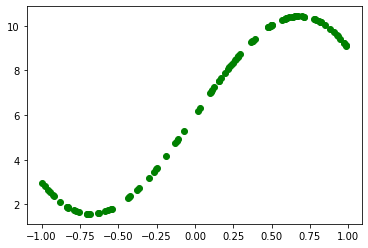

In [ ]:
#plotting test data
x_test=np.load('x_test.npy')
y_test=np.load('y_test.npy')
plt.plot(x_test, y_test, 'go')
plt.show()

It looks like our data includes Fourier Basis. 
Thus, I will make several attempts to found valid basis for our future model.

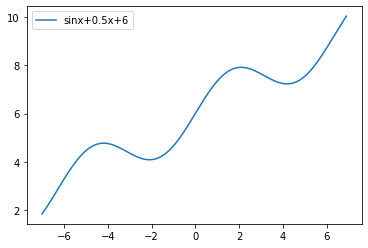

In [ ]:
x = np.arange(-7, 7, 0.1)
y1 = np.sin(x)+0.5*(x)+6
y2 = (x)**3+1.5*x**2+6
y3 = np.cos(x)*2+(x)**3+1.5*x+6
y4 = np.cos(x)*2*(x)**3+1.5*x*np.sin(x)+6

plt.plot(x, y1, label="sinx+0.5x+6")
plt.legend()
plt.show()


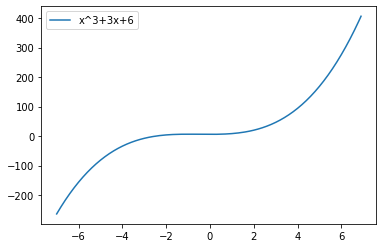

In [ ]:
plt.plot(x, y2, label="x^3+3x+6")
plt.legend()
plt.show()

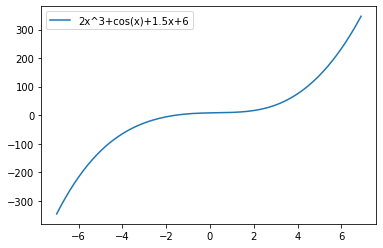

In [ ]:
plt.plot(x, y3, label="2x^3+cos(x)+1.5x+6")
plt.legend()
plt.show()

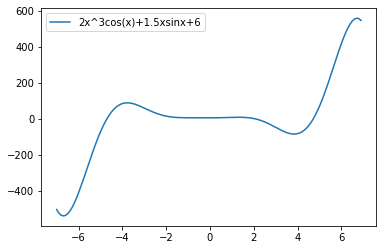

In [ ]:
plt.plot(x, y4, label="2x^3cos(x)+1.5xsinx+6")
plt.legend()
plt.show()

The last one looks familiar, so let's use composition of polynomial and Fourier basises for our model.

**Answer to the second question**: 

Relationship between one variable and output is non-linear. We need to add some non-linearity to the model. I believe that we should use polynomial and Fourier basis functions for training.

I see a right basis as following:


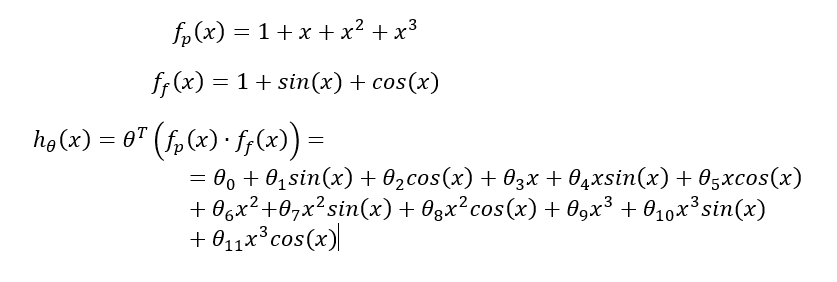

In [ ]:
def apply_basis(x):
  basis_composition=[np.ones((x.shape[0], 1)), 
                    np.sin(x),
                    np.cos(x),
                    x,
                    x*np.sin(x),
                    x*np.cos(x),
                    x**2,
                    (x**2)*np.sin(x),
                    (x**2)*np.cos(x),
                    x**3,
                    (x**3)*np.sin(x),
                    (x**3)*np.cos(x),]
  return np.hstack(basis_composition)
basis = apply_basis(x_data)
# creating weight function
theta = np.random.randn(len(basis[1]))

Our weight function and basis function is done. Let's apply gradient descent to our model to minimize error or cost function.
I will track the cost function to find out how many iterations would be effective.

In [ ]:
def gradient_descent(basis,y,theta,lr,it):
  cost=np.zeros(it)
  m=len(basis[1])
  for i in range(it):
    prediction=np.sum(basis * theta.T , axis=1)
    cost[i] = np.sum((y - prediction)**2)/2
    deriv = lr*(basis.T.dot(y - prediction))/m
    theta=theta+deriv
  plt.plot(cost, label="cost")
  plt.xlabel("Iterations")
  plt.ylabel("Theta")
  plt.legend()
  plt.show()
  return theta, cost[i]



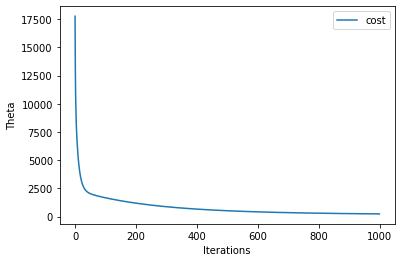

the MSE is 235.4842697916759


In [ ]:
iterations = 1000
lr=0.001
theta,train_cost = gradient_descent(basis,y_data,theta,lr,iterations)
print (f"the MSE is {train_cost}")

On the plot we see how cost function is descending. It means that we have learned our model for predictions quite well. Let's check it on test set graphically first.

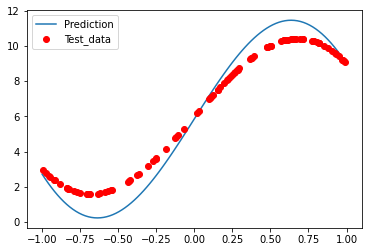

In [ ]:
x = np.linspace(-1, 1, num=100)
x=np.r_['0,2,0',x]
basis_x= apply_basis(x)
y_trained = np.sum(basis_x * theta.T , axis=1)
plt.plot(x, y_trained, label="Prediction")
plt.plot(x_test, y_test, 'ro', label = "Test_data")
plt.legend()
plt.show()

The picture above is the best model that I managed to achieve. I have tried different learning rates and number of iterations. So, now we can test our model analytically. For that we calculate an error between model and test data.

In [ ]:
# applying our basis on test set
test_basis = apply_basis(x_test)
# computing our prediction
test_prediction = np.sum(test_basis * theta.T , axis=1)
test_cost = np.sum((y_test - test_prediction)**2)/2/len(basis[1])
print (f"the MSE is {test_cost}")

the MSE is 12827.15338308157


The size of error is huge, it could be improved by adjusting the model.

However, I believe that I clearly explained my approach for the task.

Equation, which I have got as my final model is following:


y=3.75020107+6.10950276sin(x)+ 2.21252021cos(x)+1.13599346x -0.05898426xsin(x)+ 6.42828601xcos(x)+ 0.68585336x^2-8.27039656x^2 sin(x)+ 0.27816542x^2 cos(x)+ 1.23928794x^3+ 0.14475993x^3 sin(x)-1.54039724x^3 cos(x)

--------- end of a first problem --------------

--------- start of a second problem --------------

Let's load our data into variable using pandas.

In [ ]:
h_data = pd.read_csv('Assignment1_Q2_Data.csv')


We have to prepare data by parsing independent variables and dependent, hx_data and hy_data correspondignly 

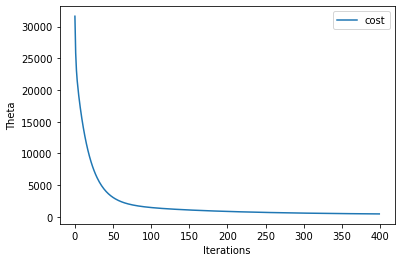

the MSE is 467.4688017512996


In [ ]:
hx_data = h_data.drop(['Price (1000$)'], axis=1).to_numpy()
hy_data = h_data[['Price (1000$)']].copy().to_numpy()
#prepare hy_data for our function
hy_data = np.squeeze(hy_data)
# set theta function
theta = np.random.randn(len(hx_data[1]))
#let apply same approach as we did in the 1st task
iterations = 400
lr=0.0001
theta,cost = gradient_descent(hx_data,hy_data,theta,lr,iterations)
print((f"the MSE is {cost}"))

**Answer to the first question**: 

Average least squares error varies in range 300-750

**Answer to the second question**:

Here the resulting approximate factors for every feauture:									
ID 0.076, Local Price 2.433, Bathrooms 0.320, Land Area 1.40 , Living area 0.12, # Garages 1.033, # Rooms 0.077, # Bedrooms 1.90, Age of home 0.058, Construction type 0.005, Architecture type -0.872, # Fire places 0.546.


Factors with most effect have the biggest theta or weight
The most signficant factor is "Local Price". But, if leave only this factor, we cannot accurately estimate the price, since we have another factors with big weight, such as "# Bedrooms" and "Land Area"

**Answer to the third question**:

Factors with least effect have the smallest theta. So, such factor is "Construction type". Which surprisingly, since it is obvious that house ID do have any relation to the price, even though it has small weight too.
If we remove this features, in the future it will reduce time amount for learning our model. But, sadly, I cannot say will it be significant.

--------- end of a second problem --------------

--------- start of a third problem --------------

To solve third problem we are computing weights for every entry. So, to compute theta I will use the following formula. I will use normal equatons, since it is easier to engineer.

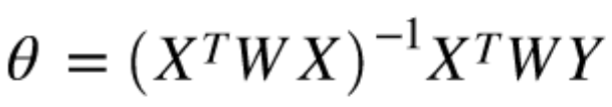

Weight formula will be

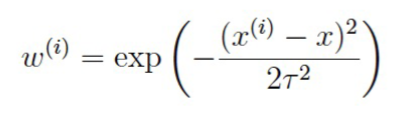

My function will compute theta for every point in data and after that calculate prediction, so we could plot it.

**Answer to the first question**: I do not need any basis function instead adding a bias to do this, since we do not building formula we are changing theta for every point analytically during prediction.

In [ ]:
def lw_regression(x, Y, tau, points):
    # add bias to our data
    x = np.hstack(([np.ones((x.shape[0], 1)), x]))
    prediction=np.zeros(points)
    space = np.linspace(-3, 3, num=points)
    j=0
    for xi in space:
      xi = np.r_[1, xi]
      w = np.exp(-1*np.sum((x - xi) ** 2, axis=1) / (2 * (tau **2) ))
      theta = np.linalg.pinv((x.T * w) @ x) @ (x.T * w) @ Y
      prediction[j] = xi @ theta
      j=j+1
# returns prediction
    return prediction, space


In [ ]:
# get data from the beginning
x_data=np.load('x_train.npy')
y_data=np.load('y_train.npy')


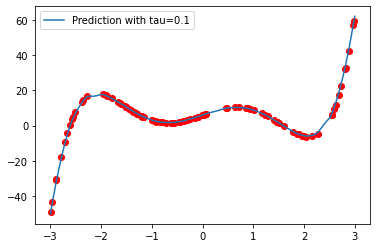

In [ ]:
points=100
tau=0.1
prediction, space  = lw_regression(x_data,y_data, tau, points)
plt.plot(x_data,y_data, 'ro')
plt.plot(space,prediction, label=f"Prediction with tau={tau}")
plt.legend()
plt.show()

The result prediction looks very well with the next settings:

number of points:40


τ=0.1

Let's compare our prediction with test data.

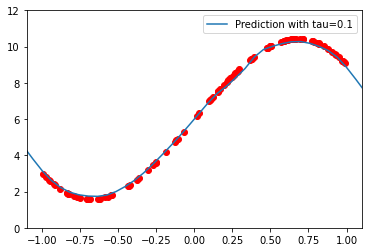

In [ ]:
plt.plot(x_test,y_test, 'ro')
plt.plot(space,prediction, label=f"Prediction with tau={tau}")
plt.ylim([0, 12])
plt.xlim([-1.1, 1.1])
plt.legend()
plt.show()

It fits quite well. Also, It even better comparing to iteratable model.

**Answer to the second question**:The main difference which I see, that this model limited by data points. So, if we try to extrapolate our model outside, we will see unnatural behaviour. Here is image with the expanded domain.

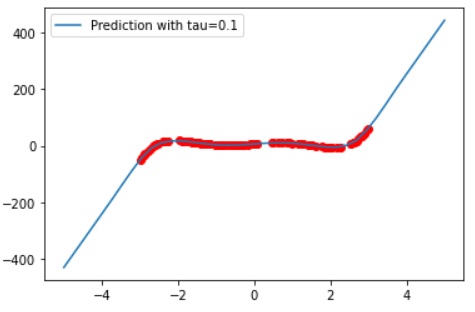

--------- end of a third problem --------------